In [39]:
import matplotlib.pyplot as plt
import numpy as np
#from scipy.stats import bernoulli, binom
import scipy.stats as stats
#import seaborn as sns
from IPython.display import Image

In [42]:
import pandas as pd

blood_transfusion_uci_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data'

df = pd.read_csv(blood_transfusion_uci_url)

In [18]:
df.head()
df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [10]:
#df.describe()
stats = df.describe()
stats

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [12]:
df['Frequency (times)'].var()

34.097507677769904

In [16]:
df.iloc[:,1].var()

34.097507677769904

In [19]:
def get_status(mes):
    if mes > 20:
        return 'tiempo sin donar'
    elif mes <= 20:
        return 'ha donado'

In [32]:
#funciones apply

df['status'] = df.apply(lambda row: get_status(row['Recency (months)']), axis = 1)


In [33]:
df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007,status
0,2,50,12500,98,1,ha donado
1,0,13,3250,28,1,ha donado
2,1,16,4000,35,1,ha donado
3,2,20,5000,45,1,ha donado
4,1,24,6000,77,0,ha donado
...,...,...,...,...,...,...
743,23,2,500,38,0,tiempo sin donar
744,21,2,500,52,0,tiempo sin donar
745,23,3,750,62,0,tiempo sin donar
746,39,1,250,39,0,tiempo sin donar


In [43]:
#cambiar de nombre las columnas
#df.rename(columns = {'Recency (months)':'mes_reciente', 'Frequency (times)':'Frecuencia'}, inplace = True)

In [45]:
corrmat = df.corr()
corrmat

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
Recency (months),1.000000,-0.182745,-0.182745,0.160618,-0.279869
Frequency (times),-0.182745,1.000000,1.000000,0.634940,0.218633
Monetary (c.c. blood),-0.182745,1.000000,1.000000,0.634940,0.218633
Time (months),0.160618,0.634940,0.634940,1.000000,-0.035854
whether he/she donated blood in March 2007,-0.279869,0.218633,0.218633,-0.035854,1.000000


In [47]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [ ]:
df.boxplot(column="Recency (months)")

In [26]:
df2 = df.groupby(['whether he/she donated blood in March 2007'])['whether he/she donated blood in March 2007'].count()
df2

whether he/she donated blood in March 2007
0    570
1    178
Name: whether he/she donated blood in March 2007, dtype: int64

<AxesSubplot:>

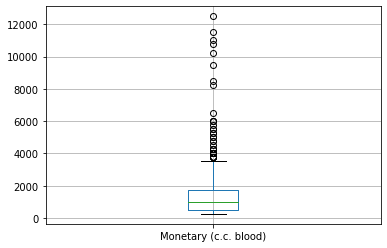

In [36]:
df.boxplot(column="Monetary (c.c. blood)")

In [30]:
import pandas as pd
cervical_cancer_uci_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv'
df3 = pd.read_csv(cervical_cancer_uci_url, na_values=['?'])
df3

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#from scipy.stats import bernoulli, binom
import scipy.stats as stats
import seaborn as sns
from IPython.display import Image

<AxesSubplot:>

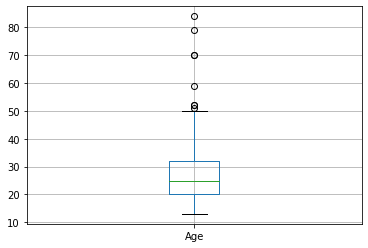

In [46]:
df3.boxplot(column="Age")

KeyError: "None of [Index(['Recency (months)'], dtype='object')] are in the [columns]"

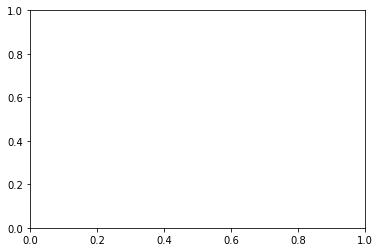

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

